In [1]:
import scipy.stats as stats
import pandas as pd
import tabulate
import models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_residuals(result, variables):
    figure = plt.figure(figsize=(20,6))


    plots = len( variables)
    rows = (plots // 3) + 1

    residuals = np.array([r[0] for r in result["residuals"]])
    limits = max(np.abs(residuals.min()), residuals.max())
    
    n = result["n"]
    for i, variable in enumerate( variables):
        axes = figure.add_subplot(rows, 3, i + 1)

        keyed_values = sorted(zip(airBnB[variable].values, residuals), key=lambda x: x[ 0])
        ordered_residuals = [x[ 1] for x in keyed_values]

        axes.plot(list(range(0, n)), ordered_residuals, '.', color="dimgray", alpha=0.75)
        axes.axhline(y=0.0, xmin=0, xmax=n, c="firebrick", alpha=0.5)
        axes.set_ylim((-limits, limits))
        axes.set_ylabel("residuals")
        axes.set_xlabel(variable)

    plt.show()
    plt.close()
    
    return residuals

In [3]:
def power(x):
    return np.power(float(x), 2)

def log( x):
    return np.log(x) if x>0 else 0

In [4]:
def correlations(data, y, xs):
    rs = []
    rhos = []
    for x in xs:
        r = stats.pearsonr(data[y], data[x])[0]
        rs.append(r)
        rho = stats.spearmanr(data[y], data[x])[0]
        rhos.append(rho)
    return pd.DataFrame({"feature": xs, "r": rs, "rho": rhos})

# Model

## Load Data

In [5]:
airBnb_csv = "../datasets/airbnb_selected_variables.csv"
airBnB = pd.read_csv(airBnb_csv)
airBnB['room_type'] = airBnB['room_type'].str.replace('/','_')
airBnB['room_type'] = airBnB['room_type'].str.replace(' ','_')
airBnB['host_response_time'] = airBnB['host_response_time'].str.replace(' ','_')

## Dummies

In [6]:
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["host_is_superhost"], prefix="superhost")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["host_response_time"], prefix="host_response_time")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["room_type"], prefix="room_type")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["property_type"], prefix="property_type")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["instant_bookable"], prefix="instant_bookable")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["neighborhood_label"], prefix="neighborhood")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["bathroom_type"], prefix="bath_type")], axis=1)

In [7]:
airBnB.head()

,Unnamed: 0,price,bedrooms,beds,accommodates,host_is_superhost,host_response_time,room_type,property_type,instant_bookable,...,property_type_hotel,property_type_house,property_type_unusual,instant_bookable_f,instant_bookable_t,neighborhood_high,neighborhood_low,neighborhood_medium,bath_type_private,bath_type_shared
0,0,20.0,1,1,2,f,within_an_hour,Private_room,house,f,...,0,1,0,1,0,0,0,1,1,0
1,1,185.0,3,3,8,f,within_an_hour,Entire_home_apt,house,f,...,0,1,0,1,0,0,1,0,0,1
2,2,221.0,2,2,4,f,within_an_hour,Entire_home_apt,apt,f,...,0,0,0,1,0,0,0,1,0,1
3,3,142.0,1,2,3,t,within_an_hour,Entire_home_apt,house,t,...,0,1,0,0,1,0,0,1,0,1
4,4,398.0,2,3,5,f,within_an_hour,Entire_home_apt,apt,t,...,0,0,0,0,1,1,0,0,0,1


## Correlations

In [8]:
used = ['bedrooms', 'beds', 'accommodates', 'host_response_rate', 'host_acceptance_rate', 'number_of_reviews', 
        'review_scores_rating', 'reviews_per_month', 'num_baths', 
        'superhost_f', 'superhost_t', 'host_response_time_a_few_days_or_more', 'host_response_time_within_a_day', 
        'host_response_time_within_a_few_hours', 'host_response_time_within_an_hour', 'room_type_Entire_home_apt', 
        'room_type_Private_room', 'room_type_Shared_room', 'property_type_apt', 'property_type_hotel', 
        'property_type_house', 'property_type_unusual', 'instant_bookable_f', 'instant_bookable_t', 'neighborhood_high', 
        'neighborhood_low', 'neighborhood_medium', 'bath_type_private', 'bath_type_shared']

correlations(airBnB, 'price', used)

,feature,r,rho
0,bedrooms,0.391956,0.415564
1,beds,0.421871,0.456713
2,accommodates,0.508050,0.553506
3,host_response_rate,0.023571,0.034322
4,host_acceptance_rate,0.102784,0.142665
5,number_of_reviews,-0.051700,-0.035164
6,review_scores_rating,-0.052113,0.003706
7,reviews_per_month,0.000882,0.011596
8,num_baths,0.472966,0.461407
9,superhost_f,-0.045080,-0.062989


Bedrooms, beds, accommodates, and number of baths have strong relationships with price.

## All in Model

In [9]:
model = "price ~ bedrooms + beds + accommodates + host_response_rate + host_acceptance_rate + number_of_reviews + review_scores_rating + reviews_per_month + num_baths + superhost_t + host_response_time_a_few_days_or_more + host_response_time_within_a_day + host_response_time_within_a_few_hours + room_type_Entire_home_apt + room_type_Private_room + property_type_apt + property_type_hotel + property_type_house + instant_bookable_t + neighborhood_high + neighborhood_low + bath_type_private"
result1 = models.bootstrap_linear_regression(model, data=airBnB)
models.describe_bootstrap_lr(result1)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,-77.37,-116.98,-47.26
bedrooms,$\beta_{1}$,12.38,9.12,16.15
beds,$\beta_{2}$,-4.20,-8.83,1.21
accommodates,$\beta_{3}$,14.38,10.11,18.11
host_response_rate,$\beta_{4}$,-0.10,-0.18,-0.01
host_acceptance_rate,$\beta_{5}$,0.19,0.08,0.31
number_of_reviews,$\beta_{6}$,-0.06,-0.09,-0.02
review_scores_rating,$\beta_{7}$,-5.63,-6.94,-3.87
reviews_per_month,$\beta_{8}$,-0.19,-3.44,2.22


## Improving the Model

In [10]:
predictions = {"bedrooms": "+", "beds": "+", "accommodates": "+", "host_response_rate": "+", "host_acceptance_rate": "+", 
               "number_of_reviews": "+", "review_scores_rating": "+", "reviews_per_month": "+", "num_baths": "+", 
               "superhost_t": "+", "host_response_time_a_few_days_or_more": "+", "host_response_time_within_a_day": "-",
               "host_response_time_within_a_few_hours": "+", 
               "room_type_Entire_home_apt": "+",
               "room_type_Private_room": "+", 
               "property_type_apt": "+", 
               
               "property_type_hotel": "+", 
               "property_type_house": "-", "property_type_unusual": "-", "instant_bookable_f": "-", 
               "instant_bookable_t": "+", "neighborhood_high": "+", "neighborhood_low": "+", "neighborhood_medium": "+", 
               "bath_type_private": "+", "bath_type_shared": "-"}
models.evaluate_coefficient_predictions(predictions, result1)

 +  +  +  +  +  +  +  +  + neighborhood_high + neighborhood_low + bath_type_private

bedrooms P(>0)=1.000 (strong)
beds P(>0)=0.090 (weak)
accommodates P(>0)=1.000 (strong)
host_response_rate P(>0)=0.010 (weak)
host_acceptance_rate P(>0)=1.000 (strong)
number_of_reviews P(>0)=0.010 (weak)
review_scores_rating P(>0)=0.000 (weak)
reviews_per_month P(>0)=0.310 (weak)
num_baths P(>0)=1.000 (strong)


KeyError: 'superhost_t'

<!-- page 762 Fundamentals -->

The coefficient of determination ($R^2$) is 37% which is low.
The error ($\sigma$) has been cut more than in half compared to the Null model (7.81) to 104.04.

__Improving the Model__

| coefficient           | expected | credible | decision |
|-----------------------|----------|----------|----------|
| bedrooms              | yes      | yes       | keep     |
| beds                  | no      | no      | remove     |
| accommodates          | yes      | yes      | keep     |
| host_response_rate    | no       | yes      | examine  |
| host_acceptance_rate	| yes      | yes      | keep     |
| number_of_reviews  	| no       | yes       | examine   |
| review_scores_rating	| no       | yes      | examine  |
| reviews_per_month   	| yes       | no       | keep   |
| num_baths             | yes      | yes      | keep     |
| superhost_t 	        | yes      | yes      | keep     |
|host_response_time_a_few_days_or_more | yes | yes | keep |
|host_response_time_within_a_day       | yes | yes | keep |
|host_response_time_within_a_few_hours | yes | yes | keep |
|room_type_Entire_home_apt             | yes | yes | keep |
|room_type_Private_room | yes | yes | keep |
|property_type_apt | yes | yes | keep |
| property_type_hotel 	| yes      | yes      | keep     |
| property_type_house 	| yes      | yes      | keep     |
| instant_bookable_t    | yes      | yes      | keep     |
| neighborhood_high     | yes      | yes      | keep     |
| neighborhood_low  	| yes      | no      | keep     |
| bath_type_private 	| yes      | no      | keep     |



The next iteration is taking out all the weakly correlated variables to see if this improves that model.  

* reviews_per_month
* neighborhood_low
* host_response_time_a_few_days_or_more

In [11]:
model = "price ~ bedrooms + beds + accommodates + host_response_rate + host_acceptance_rate + number_of_reviews + review_scores_rating + num_baths + superhost_t + host_response_time_within_a_day + host_response_time_within_a_few_hours + room_type_Entire_home_apt + room_type_Private_room + property_type_apt + property_type_hotel + property_type_house + instant_bookable_t + neighborhood_high + bath_type_private"
result1 = models.bootstrap_linear_regression(model, data=airBnB)
models.describe_bootstrap_lr(result1)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,-78.59,-131.37,-36.34
bedrooms,$\beta_{1}$,12.39,8.44,16.06
beds,$\beta_{2}$,-4.26,-9.87,0.63
accommodates,$\beta_{3}$,14.38,10.24,17.72
host_response_rate,$\beta_{4}$,-0.09,-0.19,-0.00
host_acceptance_rate,$\beta_{5}$,0.19,0.09,0.28
number_of_reviews,$\beta_{6}$,-0.06,-0.08,-0.03
review_scores_rating,$\beta_{7}$,-5.68,-7.34,-4.11
num_baths,$\beta_{8}$,42.39,33.46,55.46


Smaller sigma with these variables removed.

## Residuals

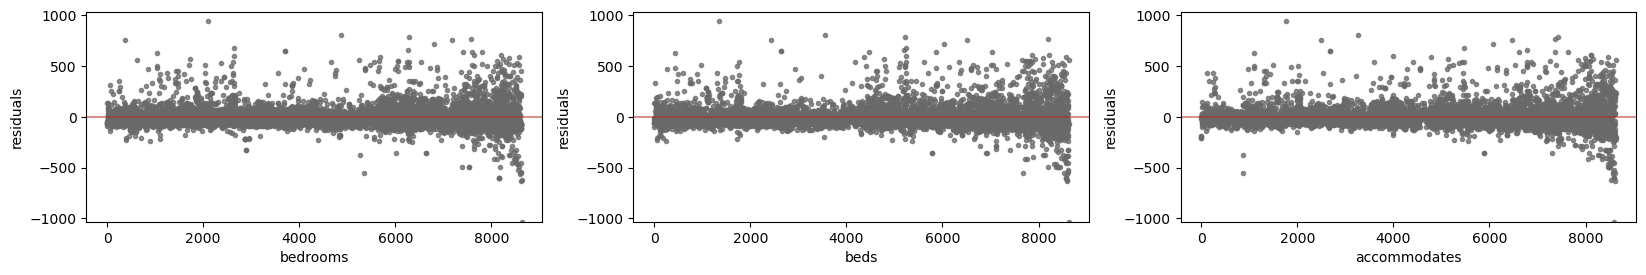

array([ -57.00848939,  -99.63317403,  -14.40259561, ..., -127.64688441,
        -12.46063954,  -28.41670684])

In [12]:
plot_residuals(result1, ["bedrooms", "beds", "accommodates"])

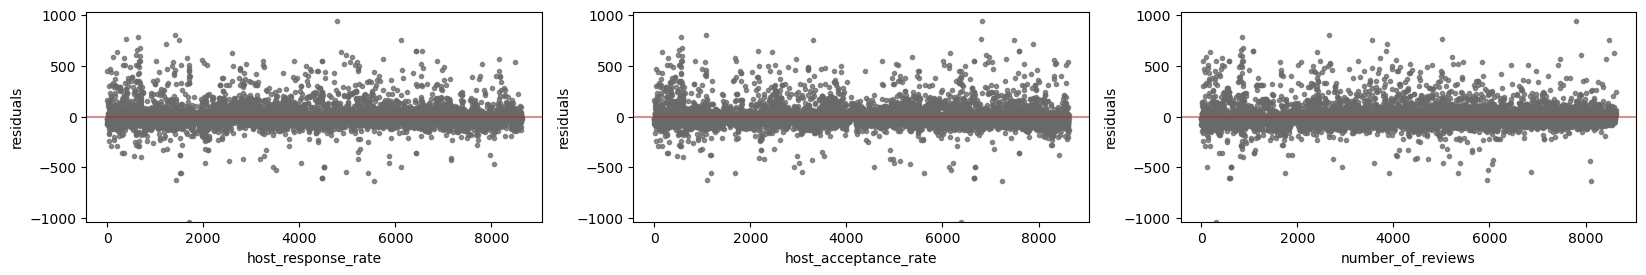

array([ -57.00848939,  -99.63317403,  -14.40259561, ..., -127.64688441,
        -12.46063954,  -28.41670684])

In [13]:
plot_residuals(result1, ["host_response_rate", "host_acceptance_rate", "number_of_reviews"])

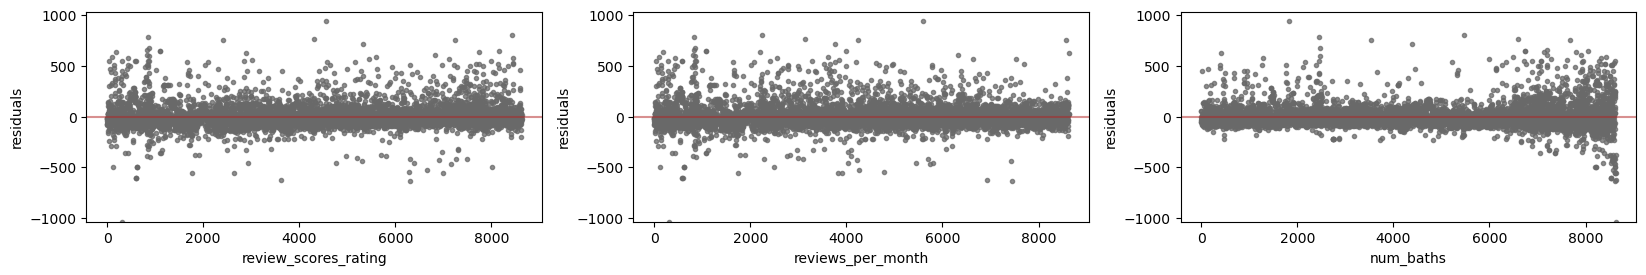

array([ -57.00848939,  -99.63317403,  -14.40259561, ..., -127.64688441,
        -12.46063954,  -28.41670684])

In [18]:
plot_residuals(result1, ["review_scores_rating", "reviews_per_month", "num_baths"])

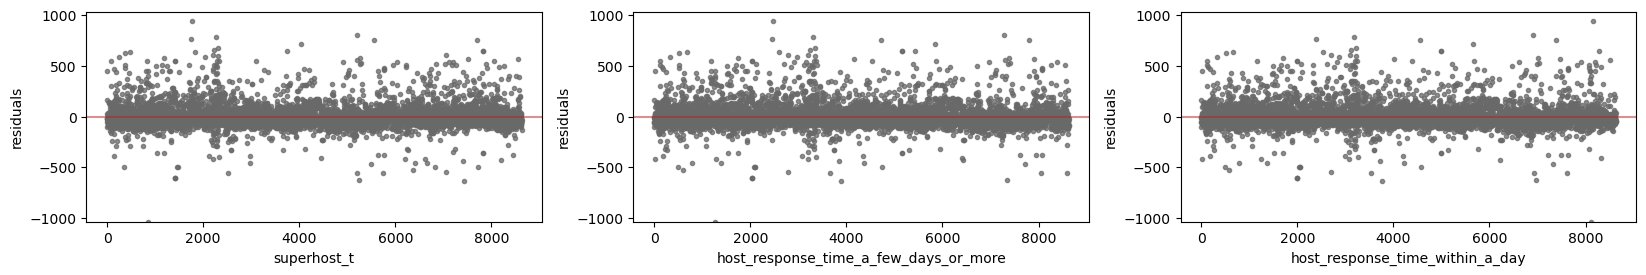

array([ -57.00848939,  -99.63317403,  -14.40259561, ..., -127.64688441,
        -12.46063954,  -28.41670684])

In [17]:
plot_residuals(result1, ["superhost_t", "host_response_time_a_few_days_or_more", "host_response_time_within_a_day"])

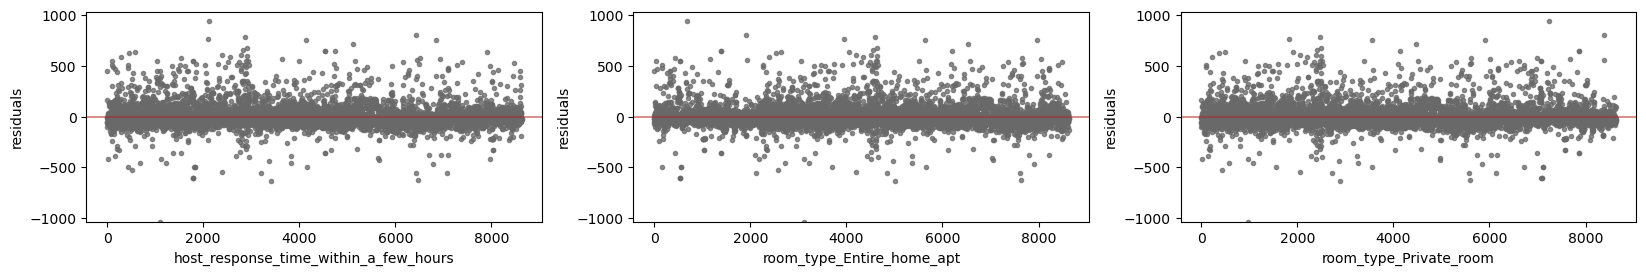

array([ -57.00848939,  -99.63317403,  -14.40259561, ..., -127.64688441,
        -12.46063954,  -28.41670684])

In [16]:
plot_residuals(result1, ["host_response_time_within_a_few_hours", "room_type_Entire_home_apt", "room_type_Private_room"])

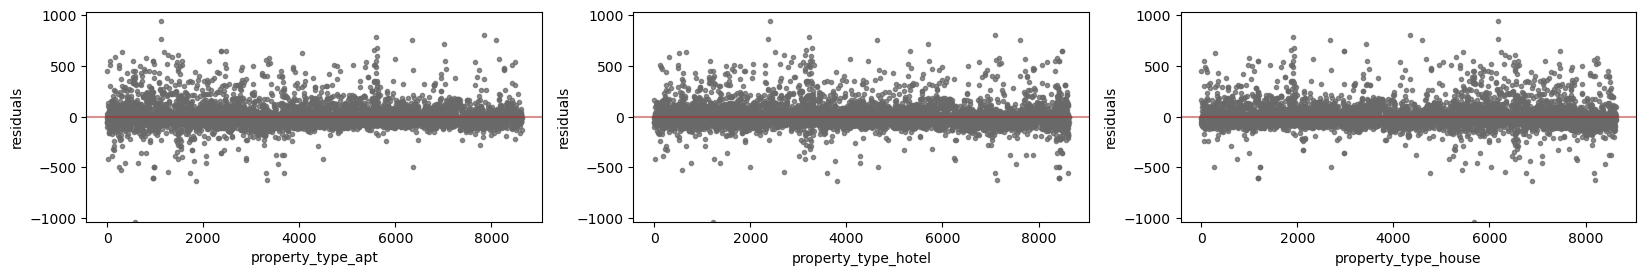

array([ -57.00848939,  -99.63317403,  -14.40259561, ..., -127.64688441,
        -12.46063954,  -28.41670684])

In [15]:
plot_residuals(result1, ["property_type_apt", "property_type_hotel", "property_type_house"])

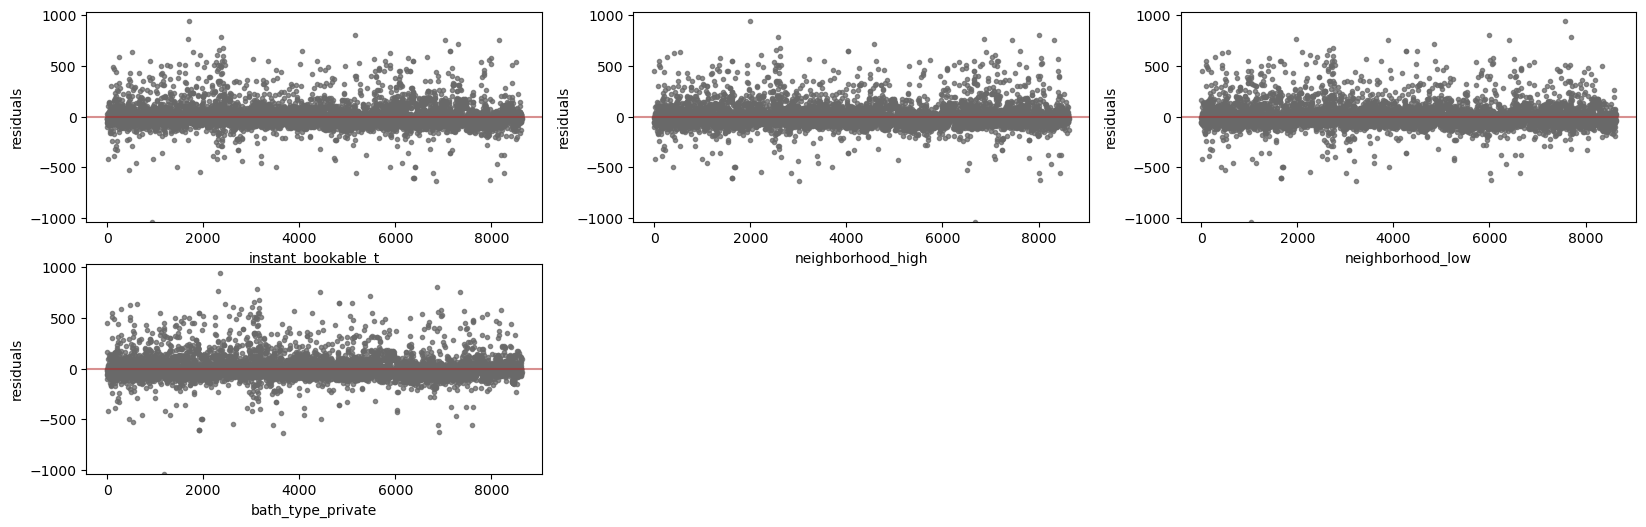

array([ -57.00848939,  -99.63317403,  -14.40259561, ..., -127.64688441,
        -12.46063954,  -28.41670684])

In [14]:
plot_residuals(result1, ["instant_bookable_t", "neighborhood_high", "neighborhood_low", "bath_type_private"])

## Transformations

Some of the graphs above are displaying heteroskedasticity. I'm going to log:

* bedrooms
* beds 
* accomodates
* num_baths

I'm also going to log some of the weak variables to lessen their influence:

* host_response_rate
* host_acceptance_rate
* number_of_reviews
* review_scores_rating
* reviews_per_month
* host_response_time_a_few_days_or_more

In [19]:
airBnB[ "bedrooms_log"] = airBnB["bedrooms"].apply(log)
airBnB[ "beds_log"] = airBnB["beds"].apply(log)
airBnB[ "accommodates_log"] = airBnB["accommodates"].apply(log)
airBnB[ "num_baths_log"] = airBnB["num_baths"].apply(log)

airBnB[ "host_response_rate_log"] = airBnB["host_response_rate"].apply(log)
airBnB[ "host_acceptance_rate_log"] = airBnB["host_acceptance_rate"].apply(log)
airBnB[ "number_of_reviews_log"] = airBnB["number_of_reviews"].apply(log)
airBnB[ "review_scores_rating_log"] = airBnB["review_scores_rating"].apply(log)

In [20]:
model = "price ~ bedrooms_log + beds_log + accommodates_log + host_response_rate_log + host_acceptance_rate_log + number_of_reviews_log + review_scores_rating_log + num_baths_log + superhost_t + host_response_time_within_a_day + host_response_time_within_a_few_hours + room_type_Entire_home_apt + room_type_Private_room + property_type_apt + property_type_hotel + property_type_house + instant_bookable_t + neighborhood_high  + bath_type_private"
result2 = models.bootstrap_linear_regression(model, data=airBnB)
models.describe_bootstrap_lr(result2)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,-21.03,-58.81,9.52
bedrooms_log,$\beta_{1}$,19.16,13.33,25.86
beds_log,$\beta_{2}$,8.72,2.87,16.17
accommodates_log,$\beta_{3}$,40.61,33.44,46.97
host_response_rate_log,$\beta_{4}$,-2.52,-4.41,-0.72
host_acceptance_rate_log,$\beta_{5}$,4.73,2.34,7.20
number_of_reviews_log,$\beta_{6}$,-5.14,-6.61,-3.84
review_scores_rating_log,$\beta_{7}$,-11.34,-16.40,-5.89
num_baths_log,$\beta_{8}$,106.38,93.83,118.13


Logging the variables has lowered our sigma to 102.78 and raised R squared to .38.

## Interaction Terms

The first interaction term I want to try is number of beds per bedroom.  I think more beds per bedroom will have a negative effect on the price.

In [21]:
model = "price ~ bedrooms_log + beds_log + accommodates_log + host_response_rate_log + host_acceptance_rate_log + number_of_reviews_log + review_scores_rating_log + num_baths_log + superhost_t + host_response_time_within_a_day + host_response_time_within_a_few_hours + room_type_Entire_home_apt + room_type_Private_room + property_type_apt + property_type_hotel + property_type_house + instant_bookable_t + neighborhood_high + bath_type_private + bedrooms:beds"
result3 = models.bootstrap_linear_regression(model, data=airBnB)
models.describe_bootstrap_lr(result3)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,-21.00,-54.35,10.99
bedrooms_log,$\beta_{1}$,20.32,3.48,29.71
beds_log,$\beta_{2}$,9.81,-0.82,17.21
accommodates_log,$\beta_{3}$,40.61,33.85,46.99
host_response_rate_log,$\beta_{4}$,-2.53,-4.51,-0.55
host_acceptance_rate_log,$\beta_{5}$,4.76,2.82,7.15
number_of_reviews_log,$\beta_{6}$,-5.15,-6.32,-3.41
review_scores_rating_log,$\beta_{7}$,-11.36,-16.66,-7.81
num_baths_log,$\beta_{8}$,107.29,94.70,119.01


That didn't change the R squared or sigma.  I'll try bathrooms per bedroom now.

In [22]:
model = "price ~ bedrooms_log + beds_log + accommodates_log + host_response_rate_log + host_acceptance_rate_log + number_of_reviews_log + review_scores_rating_log + num_baths_log + superhost_t + host_response_time_within_a_day + host_response_time_within_a_few_hours + room_type_Entire_home_apt + room_type_Private_room + property_type_apt + property_type_hotel + property_type_house + instant_bookable_t + neighborhood_high + bath_type_private + bedrooms:num_baths"
result3 = models.bootstrap_linear_regression(model, data=airBnB)
models.describe_bootstrap_lr(result3)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,-20.31,-54.10,23.52
bedrooms_log,$\beta_{1}$,21.86,1.38,31.49
beds_log,$\beta_{2}$,9.03,0.47,16.49
accommodates_log,$\beta_{3}$,40.54,34.03,45.47
host_response_rate_log,$\beta_{4}$,-2.56,-4.46,-0.79
host_acceptance_rate_log,$\beta_{5}$,4.79,2.71,7.53
number_of_reviews_log,$\beta_{6}$,-5.14,-6.51,-3.47
review_scores_rating_log,$\beta_{7}$,-11.40,-16.10,-6.66
num_baths_log,$\beta_{8}$,111.88,75.60,127.76


That made the model a little better.  R squared is higher and sigma is a little lower.

I want to try one last interaction term which is bedrooms per accomodates.

In [23]:
model = "price ~ bedrooms_log + beds_log + accommodates_log + host_response_rate_log + host_acceptance_rate_log + number_of_reviews_log + review_scores_rating_log + num_baths_log + superhost_t + host_response_time_within_a_day + host_response_time_within_a_few_hours + room_type_Entire_home_apt + room_type_Private_room + property_type_apt + property_type_hotel + property_type_house + instant_bookable_t + neighborhood_high + bath_type_private + bedrooms:num_baths + bedrooms:accommodates"
result4 = models.bootstrap_linear_regression(model, data=airBnB)
models.describe_bootstrap_lr(result4)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,-14.80,-57.93,19.46
bedrooms_log,$\beta_{1}$,11.39,-1.01,20.25
beds_log,$\beta_{2}$,5.46,-1.19,13.52
accommodates_log,$\beta_{3}$,27.16,19.11,35.13
host_response_rate_log,$\beta_{4}$,-2.64,-4.87,-0.55
host_acceptance_rate_log,$\beta_{5}$,4.65,2.55,7.39
number_of_reviews_log,$\beta_{6}$,-4.85,-6.69,-3.49
review_scores_rating_log,$\beta_{7}$,-12.01,-16.41,-7.15
num_baths_log,$\beta_{8}$,116.32,98.54,127.22


That yielded a slight improvment in our sigma to 102.23.

## Null Model Comparison

The null model R squared is .37 with a sigma of 104.  

We improved the null model R squared to .39 with a sigma of 102.23.